In [26]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)

import numpy as np

from sklearn import preprocessing as pre
import matplotlib.pyplot as plt

from scipy import stats

In [27]:

# Importing CSV files

df_AlCon = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\CSVs\LIMS Actuals\425 SAO Al_actual.csv")



In [28]:
print(df_AlCon.head())

print("Data types in df_AlCon:\n", df_AlCon.dtypes)

                  Date  425 SAO Al
0  2012-05-13 05:00:00       6.249
1  2012-05-20 05:00:00       6.367
2  2012-05-27 05:00:00       6.183
3  2012-06-03 05:00:00       6.257
4  2012-06-17 05:00:00       6.479
Data types in df_AlCon:
 Date           object
425 SAO Al    float64
dtype: object


In [29]:

# Convert the 'Date' column to datetime
df_AlCon['Date'] = pd.to_datetime(df_AlCon['Date'])

# Sort the dataframe by Date
df_AlCon = df_AlCon.sort_values(by='Date')


print("Data types in df_AlCon:\n", df_AlCon.dtypes)

Data types in df_AlCon:
 Date          datetime64[ns]
425 SAO Al           float64
dtype: object


In [30]:
print(df_AlCon.describe())
#print(df_AlCon0.describe())


        425 SAO Al
count  2771.000000
mean      6.055173
std       0.482038
min       0.037000
25%       5.963000
50%       6.107000
75%       6.237500
max       8.058000


In [31]:
# Filter rows where '425 SAO Al' column has values less than 0
removed_rows = df_AlCon[df_AlCon['425 SAO Al'] < 0]

# Display the removed rows
print("Rows removed from df_AlCon:")
print(removed_rows)

# Remove these rows from df_AlCon
df_AlCon = df_AlCon.drop(removed_rows.index)


Rows removed from df_AlCon:
Empty DataFrame
Columns: [Date, 425 SAO Al]
Index: []


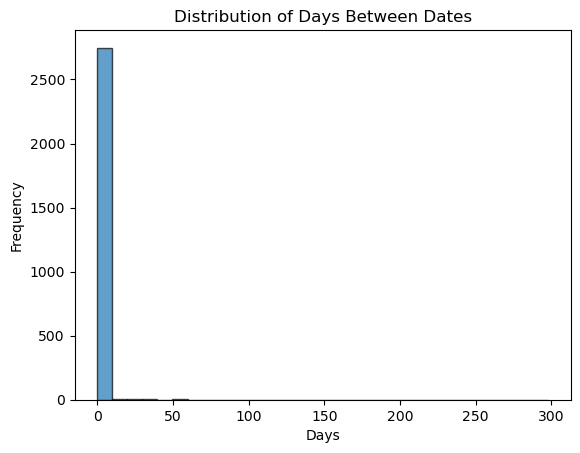

count    2770.000000
mean        1.475812
std         6.800593
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       298.000000
Name: Date_Difference, dtype: float64
0.0        49
1.0      2484
2.0       152
3.0        27
4.0        13
5.0         6
6.0         5
7.0         9
8.0         2
9.0         1
10.0        1
12.0        2
13.0        1
14.0        1
15.0        1
16.0        1
19.0        2
20.0        1
22.0        1
23.0        1
29.0        1
32.0        1
35.0        1
44.0        1
51.0        1
52.0        1
79.0        1
99.0        1
105.0       1
298.0       1
Name: Date_Difference, dtype: int64


In [32]:
#print(df_CDAlp['Date'])

# # Sort the dataframe by Date
# df_AlCon = df_AlCon.sort_values(by='Date')

# Calculate the difference between consecutive dates
df_AlCon['Date_Difference'] = df_AlCon['Date'].diff().dt.days

# Drop the NaN value from the first row
date_differences = df_AlCon['Date_Difference'].dropna()

# Plot a histogram
plt.hist(date_differences, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Days Between Dates')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics
print(date_differences.describe())

# Get counts of each unique difference
unique_diff_counts = df_AlCon['Date_Difference'].value_counts().sort_index()

print(unique_diff_counts)

In [33]:
# Filter rows where the difference is greater than 10 days
large_gaps = df_AlCon[df_AlCon['Date_Difference'] > 10]

# Print the date pairs
for idx, row in large_gaps.iterrows():
    previous_date = row['Date'] - pd.Timedelta(days=row['Date_Difference'])
    print(f"Gap of {row['Date_Difference']} days: {previous_date.strftime('%Y-%m-%d')} to {row['Date'].strftime('%Y-%m-%d')}")

Gap of 14.0 days: 2012-06-03 to 2012-06-17
Gap of 105.0 days: 2012-06-17 to 2012-09-30
Gap of 23.0 days: 2012-10-01 to 2012-10-24
Gap of 298.0 days: 2012-10-27 to 2013-08-21
Gap of 44.0 days: 2014-04-18 to 2014-06-01
Gap of 29.0 days: 2016-04-30 to 2016-05-29
Gap of 35.0 days: 2017-08-02 to 2017-09-06
Gap of 32.0 days: 2019-02-28 to 2019-04-01
Gap of 19.0 days: 2020-06-26 to 2020-07-15
Gap of 99.0 days: 2020-08-24 to 2020-12-01
Gap of 15.0 days: 2020-12-29 to 2021-01-13
Gap of 16.0 days: 2021-02-14 to 2021-03-02
Gap of 12.0 days: 2021-09-20 to 2021-10-02
Gap of 13.0 days: 2021-11-07 to 2021-11-20
Gap of 12.0 days: 2021-11-20 to 2021-12-02
Gap of 51.0 days: 2022-02-20 to 2022-04-12
Gap of 20.0 days: 2022-07-09 to 2022-07-29
Gap of 52.0 days: 2022-08-30 to 2022-10-21
Gap of 79.0 days: 2022-10-21 to 2023-01-08
Gap of 19.0 days: 2023-03-23 to 2023-04-11
Gap of 22.0 days: 2023-07-07 to 2023-07-29


In [34]:
# Filter rows where the timestamp is on the hour (i.e., minute is 0)
df_AlCon_on_hour = df_AlCon[df_AlCon['Date'].dt.minute == 0].copy()

# Filter rows where the timestamp is not on the hour (i.e., minute is not 0)
df_AlCon_off_hour = df_AlCon[df_AlCon['Date'].dt.minute != 0].copy()



print(df_AlCon_on_hour.value_counts())
print(df_AlCon_off_hour.value_counts())

Date                 425 SAO Al  Date_Difference
2012-05-20 05:00:00  6.367       7.0                1
2019-09-15 05:00:00  6.218       1.0                1
2019-09-06 05:00:00  6.476       1.0                1
2019-09-07 05:00:00  6.380       1.0                1
2019-09-08 05:00:00  6.331       1.0                1
                                                   ..
2016-09-25 05:00:00  5.973       1.0                1
2016-09-26 05:00:00  5.814       1.0                1
2016-09-27 05:00:00  5.867       1.0                1
2016-09-28 05:00:00  5.910       1.0                1
2023-08-31 00:00:00  6.419       1.0                1
Length: 2770, dtype: int64
Series([], dtype: int64)


In [35]:
# def round_to_nearest_hour(timestamp):
#     # List of target hours
#     target_hours = [0, 5, 12, 17]
    
#     # Check if the timestamp is within 59 minutes of any target hour
#     for hour in target_hours:
#         if hour == 0:
#             # Special case for 00:00
#             lower_bound = timestamp.replace(hour=23, minute=59, second=0, microsecond=0)
#             upper_bound = (timestamp + pd.Timedelta(days=1)).replace(hour=0, minute=59, second=0, microsecond=0)
#         else:
#             lower_bound = timestamp.replace(hour=hour-1, minute=59, second=0, microsecond=0)
#             upper_bound = timestamp.replace(hour=hour, minute=59, second=0, microsecond=0)
        
#         if lower_bound <= timestamp <= upper_bound:
#             if hour == 0:
#                 # If rounding to 00:00, increment the day by 1
#                 return (timestamp + pd.Timedelta(days=1)).replace(hour=0, minute=0, second=0, microsecond=0)
#             else:
#                 return timestamp.replace(hour=hour, minute=0, second=0, microsecond=0)
    
#     # For the remaining timestamps, round to the nearest hour
#     if timestamp.minute >= 30:
#         return (timestamp + pd.Timedelta(hours=1)).replace(minute=0, second=0, microsecond=0)
#     else:
#         return timestamp.replace(minute=0, second=0, microsecond=0)

# # Apply the function to the 'Date' column of df_AlCon_off_hour and store the results in a new column 'RoundedDate'
# df_AlCon_off_hour['RoundedDate'] = df_AlCon_off_hour['Date'].apply(round_to_nearest_hour)


In [36]:
# # Apply the modified function to the 'Date' column of df_AlCon_off_hour
# df_AlCon_off_hour['RoundedDate'] = df_AlCon_off_hour['Date'].apply(round_to_nearest_hour)

# # Filter out the rows in df_AlCon_off_hour where the RoundedDate column has on-the-hour times
# on_hour_rows = df_AlCon_off_hour[df_AlCon_off_hour['RoundedDate'].dt.minute == 0]

# # Concatenate these rows to df_AlCon_on_hour
# df_AlCon_on_hour = pd.concat([df_AlCon_on_hour, on_hour_rows])

# # Remove these rows from df_AlCon_off_hour
# df_AlCon_off_hour = df_AlCon_off_hour[df_AlCon_off_hour['RoundedDate'].dt.minute != 0]

# # Sort df_AlCon_on_hour by 'Date' column
# # RESET the Index
# df_AlCon_on_hour = df_AlCon_on_hour.sort_values(by='Date').reset_index(drop=True)


In [37]:
# # Fill empty values in 'RoundedDate' with values from 'Date'
# df_AlCon_on_hour['RoundedDate'].fillna(df_AlCon_on_hour['Date'], inplace=True)

# # Rename columns
# df_AlCon_on_hour.rename(columns={'Date': 'DateSource', 'RoundedDate': 'Date'}, inplace=True)

# df_AlCon = df_AlCon_on_hour[:]


# Save df_AlCon_on_hour to a CSV file
#df_AlCon_on_hour.to_csv('df_AlCon_on_hour.csv', index=False)

# Save df_AlCon_off_hour to a CSV file
#df_AlCon_off_hour.to_csv('df_AlCon_off_hour.csv', index=False)


In [38]:
# # Check for matching dates
# matching_dates = df_AlCon['Date'][df_AlCon['Date'].isin(df_CDAlp['Date'])]

# # Print the matching dates and their count
# print("Matching dates:", matching_dates.unique())
# print("Number of matching dates:", len(matching_dates.unique()))


In [39]:

# df_AlCon = df_AlCon.drop("DateSource", axis=1)
# # Assuming 'Date' is the name of the column you want to move to the first position
# df_AlCon = df_AlCon[['Date'] + [col for col in df_AlCon.columns if col != 'Date']]



In [40]:
print("Sample dates from df_AlCon:\n", df_AlCon['Date'].head())
#print("\nSample dates from df_CDAlp:\n", df_CDAlp['Date'].head())


Sample dates from df_AlCon:
 0   2012-05-13 05:00:00
1   2012-05-20 05:00:00
2   2012-05-27 05:00:00
3   2012-06-03 05:00:00
4   2012-06-17 05:00:00
Name: Date, dtype: datetime64[ns]


In [41]:
print("Columns in df_AlCon:", df_AlCon.columns)
#print("Columns in df_CDAlp:", df_CDAlp.columns)


Columns in df_AlCon: Index(['Date', '425 SAO Al', 'Date_Difference'], dtype='object')


In [42]:
# Merge the dataframes based on the 'Date' column
#df_AlCon = df_AlCon.merge(df_CDAlp[['Date', 'FC42428', 'FC03043213']], on='Date', how='left')


In [43]:
# Extract unique hh:mm:ss from df_CDAlp's 'Date' column
#df_CDDate = df_CDAlp['Date'].dt.strftime('%H:%M:%S').unique()

# Extract unique hh:mm:ss from df_AlCon's 'Date' column
df_AlConDate = df_AlCon['Date'].dt.strftime('%H:%M:%S').unique()

# print("Unique times from df_CDAlp:")
# print(df_CDDate)

print("\nUnique times from df_AlCon:")
print(df_AlConDate)


Unique times from df_AlCon:
['05:00:00' '16:00:00' '03:00:00' '12:00:00' '18:00:00' '04:00:00'
 '10:00:00' '09:00:00' '23:00:00' '14:00:00' '11:00:00' '02:00:00'
 '15:00:00' '19:00:00' '17:00:00' '07:00:00' '08:00:00' '00:00:00']


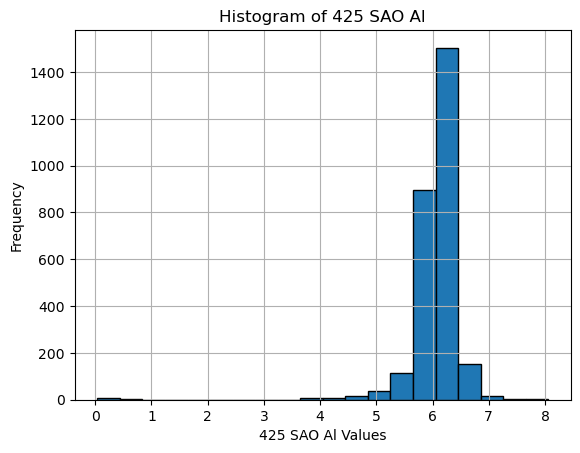

In [44]:


# Assuming df_AlCon is your DataFrame with the 'wghtdAvg' column

# Create a histogram of the 'wghtdAvg' column
plt.hist(df_AlCon['425 SAO Al'], bins=20, edgecolor='k')  # You can adjust the number of bins as needed
plt.title('Histogram of 425 SAO Al')
plt.xlabel('425 SAO Al Values')
plt.ylabel('Frequency')
plt.grid(True)

# Show the histogram
plt.show()


In [45]:
print(df_AlCon)

                    Date  425 SAO Al  Date_Difference
0    2012-05-13 05:00:00       6.249              NaN
1    2012-05-20 05:00:00       6.367              7.0
2    2012-05-27 05:00:00       6.183              7.0
3    2012-06-03 05:00:00       6.257              7.0
4    2012-06-17 05:00:00       6.479             14.0
...                  ...         ...              ...
2766 2023-08-27 00:00:00       6.285              1.0
2767 2023-08-28 00:00:00       6.351              1.0
2768 2023-08-29 00:00:00       6.462              1.0
2769 2023-08-30 00:00:00       6.437              1.0
2770 2023-08-31 00:00:00       6.419              1.0

[2771 rows x 3 columns]


In [46]:
# Assuming df_AlCon is your DataFrame

# Use the duplicated() method to find duplicate rows
duplicate_rows = df_AlCon[df_AlCon.duplicated()]

# Use the sum() method to count the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

# Print the count of duplicate rows
print("Number of duplicate rows in df_AlCon:", num_duplicate_rows)

print(duplicate_rows)


Number of duplicate rows in df_AlCon: 0
Empty DataFrame
Columns: [Date, 425 SAO Al, Date_Difference]
Index: []


In [47]:
# Assuming df_AlCon is your DataFrame with a 'Date' column

# Sort the DataFrame by the 'Date' column in ascending order
df_AlCon.sort_values(by='Date', inplace=True)

# Remove rows with NaN values in any column
df_AlCon.dropna(inplace=True)

# Reset the index to have a continuous index after removing rows
df_AlCon.reset_index(drop=True, inplace=True)

# Now, df_AlCon is sorted by date and has rows with NaN values removed

print(df_AlCon)


                    Date  425 SAO Al  Date_Difference
0    2012-05-20 05:00:00       6.367              7.0
1    2012-05-27 05:00:00       6.183              7.0
2    2012-06-03 05:00:00       6.257              7.0
3    2012-06-17 05:00:00       6.479             14.0
4    2012-09-30 16:00:00       6.106            105.0
...                  ...         ...              ...
2765 2023-08-27 00:00:00       6.285              1.0
2766 2023-08-28 00:00:00       6.351              1.0
2767 2023-08-29 00:00:00       6.462              1.0
2768 2023-08-30 00:00:00       6.437              1.0
2769 2023-08-31 00:00:00       6.419              1.0

[2770 rows x 3 columns]


In [48]:

# This was used to explore the frequency of occurances by date

# Assuming df_AlCon is your DataFrame with a 'Date' column

# # Convert the 'Date' column to datetime if not already
# df_AlCon['Date'] = pd.to_datetime(df_AlCon['Date'])

# # Extract the date component from the 'Date' column
# df_AlCon['Date_only'] = df_AlCon['Date'].dt.date

# # Group the DataFrame by the 'Date_only' column and count the groups
# count_per_day = df_AlCon.groupby('Date_only').size().reset_index(name='Count')

# # Filter rows with a count greater than one
# filtered_dates = count_per_day[count_per_day['Count'] > 1]

# # Use the filtered dates to select rows from the original DataFrame df_AlCon
# filtered_df = df_AlCon[df_AlCon['Date_only'].isin(filtered_dates['Date_only'])]

# # Now, filtered_df contains rows with more than one occurrence in df_AlCon, including the time

# # Print the result
# print(filtered_df)

# Save df_AlCon_on_hour to a CSV file
# filtered_df.to_csv('filtered_df.csv', index=False)


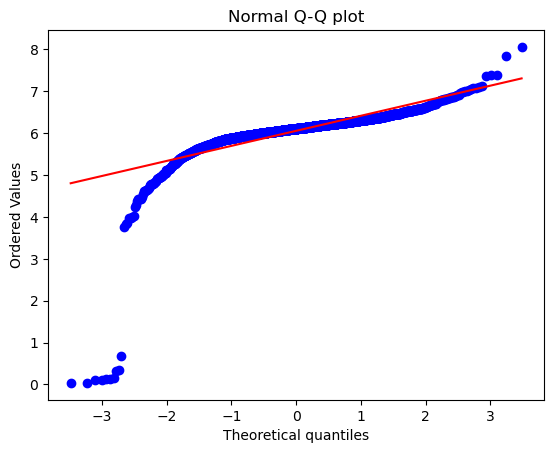

In [49]:
import scipy.stats as stats

# Create a normal Q-Q plot
stats.probplot(df_AlCon['425 SAO Al'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [50]:
df_AlCon = df_AlCon.drop('Date_Difference', axis=1)


# Save df_AlCon_on_hour to a CSV file
df_AlCon.to_csv('df_AlCon.csv', index=False)